In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [8]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [9]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
import warnings
warnings.filterwarnings('ignore')

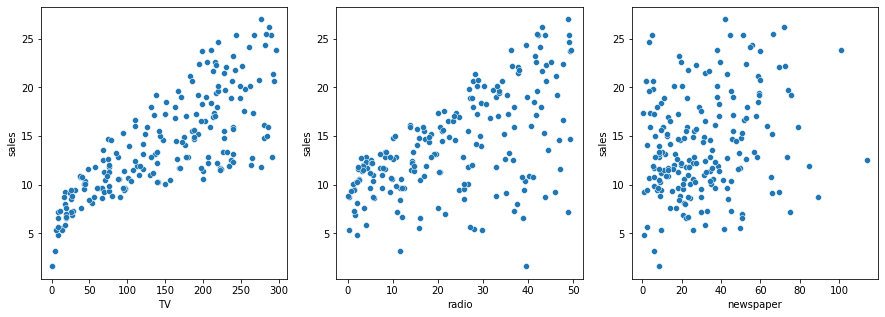

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.scatterplot('TV','sales',data=df)

plt.subplot(1,3,2)
sns.scatterplot('radio','sales',data=df)

plt.subplot(1,3,3)
sns.scatterplot('newspaper','sales',data=df)

plt.show()

In [12]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [13]:
plt.style.use('seaborn')

In [14]:
x = df[['TV']]

In [15]:
y = df.sales

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x,y)

LinearRegression()

In [19]:
print(lr.intercept_)

7.032593549127694


In [20]:
print(lr.coef_)

[0.04753664]


In [21]:
7.032593549127694+0.04753664*50

9.409425549127693

In [22]:
x_new = pd.DataFrame({'TV':[50]})


In [23]:
x_new

,TV
0,50


In [24]:
lr.predict(x_new)

array([9.40942557])

In [25]:
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})

In [26]:
x_new.head()

,TV
0,0.7
1,296.4


In [27]:
preds = lr.predict(x_new)

In [28]:
preds

array([ 7.0658692 , 21.12245377])

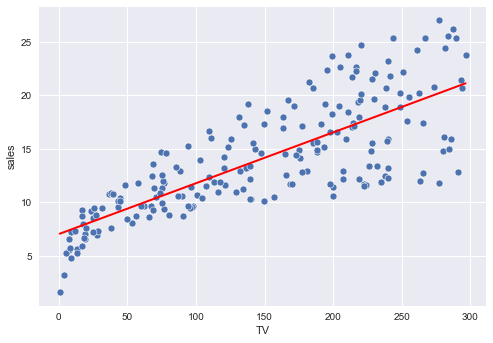

In [29]:
sns.scatterplot('TV','sales',data=df)

plt.plot(x_new,preds,c='red',linewidth = 2)

plt.show()

In [30]:
import statsmodels.formula.api as smf

In [31]:
lm = smf.ols(formula='sales~TV',data=df).fit()

In [32]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [33]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.47e-42
Time:                        09:09:38   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [35]:
lm.rsquared

0.611875050850071

In [36]:
lm.rsquared_adj

0.6099148238341623

In [37]:
# multiple linear regression

In [38]:
xx = df[['TV','newspaper','radio']]

In [39]:
yy = df.sales

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr = LinearRegression()

In [42]:
lr.fit(xx,yy)

LinearRegression()

In [43]:
lr.coef_

array([ 0.04576465, -0.00103749,  0.18853002])

In [44]:
lr.intercept_

2.938889369459412

In [45]:
lmm = smf.ols(formula='sales~TV+newspaper+radio', data=df).fit()

In [46]:
lmm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        09:09:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
lmm.conf_int()

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
newspaper,-0.012616,0.010541
radio,0.171547,0.205513


In [48]:
two = smf.ols(formula='sales~TV+radio',data=df).fit()

In [49]:
two.rsquared

0.8971942610828956

In [50]:
three = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [51]:
three.rsquared

0.8972106381789522

In [52]:
np.random.seed(12345)

In [53]:
nums = np.random.rand(len(df))

In [54]:
mask_suburban = (nums>0.33) & (nums<0.66)

In [55]:
mask_urban = nums>0.66

In [56]:
df['Targeted_geography'] = 'rural'

In [57]:
df.loc[mask_suburban, 'Targeted_geography'] = 'suburban'

In [58]:
df.loc[mask_urban,'Targeted_geography'] = 'urban'

In [59]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography
0,1,230.1,37.8,69.2,22.1,urban
1,2,44.5,39.3,45.1,10.4,rural
2,3,17.2,45.9,69.3,9.3,rural
3,4,151.5,41.3,58.5,18.5,rural
4,5,180.8,10.8,58.4,12.9,suburban


In [60]:
tg = pd.get_dummies(df['Targeted_geography'],drop_first=True,prefix ='Targeted_geography' )

In [61]:
dff = pd.concat([df,tg] ,axis = 1)

In [62]:
number = np.random.rand(len(df))

In [63]:
large_number = number>0.5

In [64]:
df['Scale'] = 'small'

In [65]:
df

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography,Scale
0,1,230.1,37.8,69.2,22.1,urban,small
1,2,44.5,39.3,45.1,10.4,rural,small
2,3,17.2,45.9,69.3,9.3,rural,small
3,4,151.5,41.3,58.5,18.5,rural,small
4,5,180.8,10.8,58.4,12.9,suburban,small
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,rural,small
196,197,94.2,4.9,8.1,9.7,rural,small
197,198,177.0,9.3,6.4,12.8,suburban,small
198,199,283.6,42.0,66.2,25.5,rural,small


In [66]:
df

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography,Scale
0,1,230.1,37.8,69.2,22.1,urban,small
1,2,44.5,39.3,45.1,10.4,rural,small
2,3,17.2,45.9,69.3,9.3,rural,small
3,4,151.5,41.3,58.5,18.5,rural,small
4,5,180.8,10.8,58.4,12.9,suburban,small
...,...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,rural,small
196,197,94.2,4.9,8.1,9.7,rural,small
197,198,177.0,9.3,6.4,12.8,suburban,small
198,199,283.6,42.0,66.2,25.5,rural,small


In [67]:
df.loc[large_number,'Scale'] = 'large'

In [68]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography,Scale
0,1,230.1,37.8,69.2,22.1,urban,large
1,2,44.5,39.3,45.1,10.4,rural,small
2,3,17.2,45.9,69.3,9.3,rural,small
3,4,151.5,41.3,58.5,18.5,rural,large
4,5,180.8,10.8,58.4,12.9,suburban,small


In [69]:
df['Is_large'] = df.Scale.map({'small':0,'large':1})

In [70]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography,Scale,Is_large
0,1,230.1,37.8,69.2,22.1,urban,large,1
1,2,44.5,39.3,45.1,10.4,rural,small,0
2,3,17.2,45.9,69.3,9.3,rural,small,0
3,4,151.5,41.3,58.5,18.5,rural,large,1
4,5,180.8,10.8,58.4,12.9,suburban,small,0


In [71]:
feature_col = ['TV','radio','newspaper','Is_large']

In [72]:
x = df[feature_col]
y = df.sales

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(x,y)

LinearRegression()

In [76]:
i = 0

for col in feature_col:
    print('The coefficient of', col, 'is:', lr.coef_[i])
    i+=1

The coefficient of TV is: 0.04588872172029394
The coefficient of radio is: 0.18805207011074676
The coefficient of newspaper is: -0.0004993799598608745
The coefficient of Is_large is: 0.17502646122141122


In [77]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Targeted_geography,Scale,Is_large
0,1,230.1,37.8,69.2,22.1,urban,large,1
1,2,44.5,39.3,45.1,10.4,rural,small,0
2,3,17.2,45.9,69.3,9.3,rural,small,0
3,4,151.5,41.3,58.5,18.5,rural,large,1
4,5,180.8,10.8,58.4,12.9,suburban,small,0


In [86]:
fea_col = ['TV','radio','newspaper','Is_large','Targeted_geography_suburban', 'Targeted_geography_urban']

In [87]:
y = df.sales

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(x,y)

LinearRegression()

In [91]:
print(fea_col,lr.coef_)

['TV', 'radio', 'newspaper', 'Is_large', 'Targeted_geography_suburban', 'Targeted_geography_urban'] [ 0.04588872  0.18805207 -0.00049938  0.17502646]


In [338]:
from sklearn.preprocessing import StandardScaler 

In [339]:
scaler = StandardScaler()

In [340]:
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
linear_regression = LinearRegression()

In [341]:
sns.set()

In [342]:
import statsmodels.api as smf

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
def adj_r2(x,y):
    r2 = linear_regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = ((n-p-1)-(1-r2)*(n-1))/(n-p-1)
    return adjusted_r2

In [345]:
df = pd.read_csv('Admission_Prediction.csv')

In [346]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [347]:
df.describe(include='all')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [348]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [349]:
df['University Rating'].fillna(df['University Rating'].mode()[0],inplace=True)

In [350]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)

In [351]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [352]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [353]:
df.drop('Serial No.',axis=1,inplace=True)

In [354]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


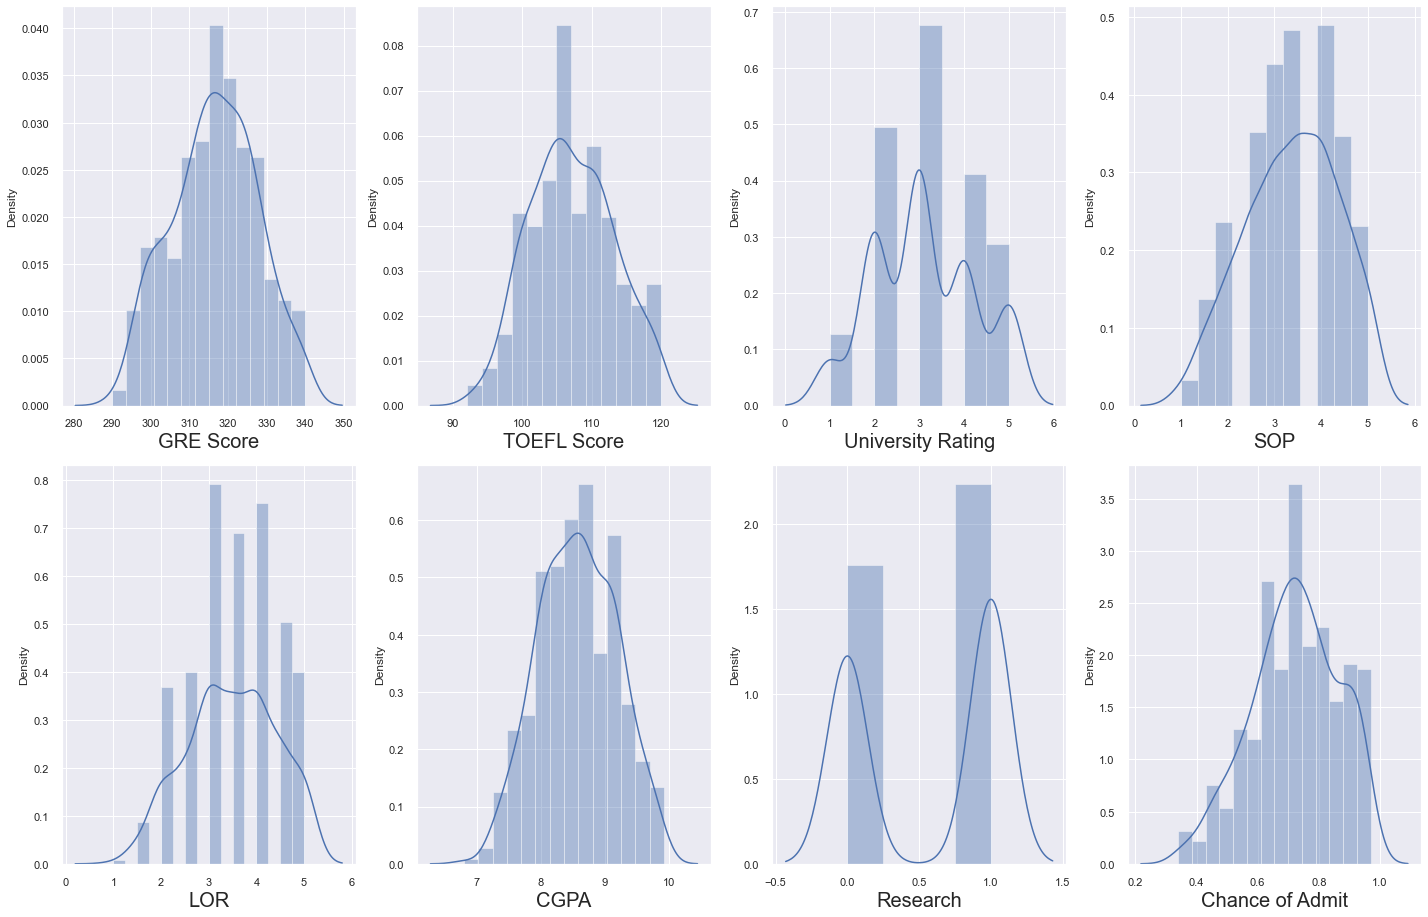

In [355]:
plt.figure(figsize=(20,25))

n = 1

for i in df:
    if n<=16:
        ax = plt.subplot(4,4,n)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize = 20)
    n+=1
plt.tight_layout()

In [356]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [357]:
y = df['Chance of Admit']

In [358]:
x = df.drop('Chance of Admit', axis=1)

In [359]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0


In [360]:
%matplotlibe inline

UsageError: Line magic function `%matplotlibe` not found.


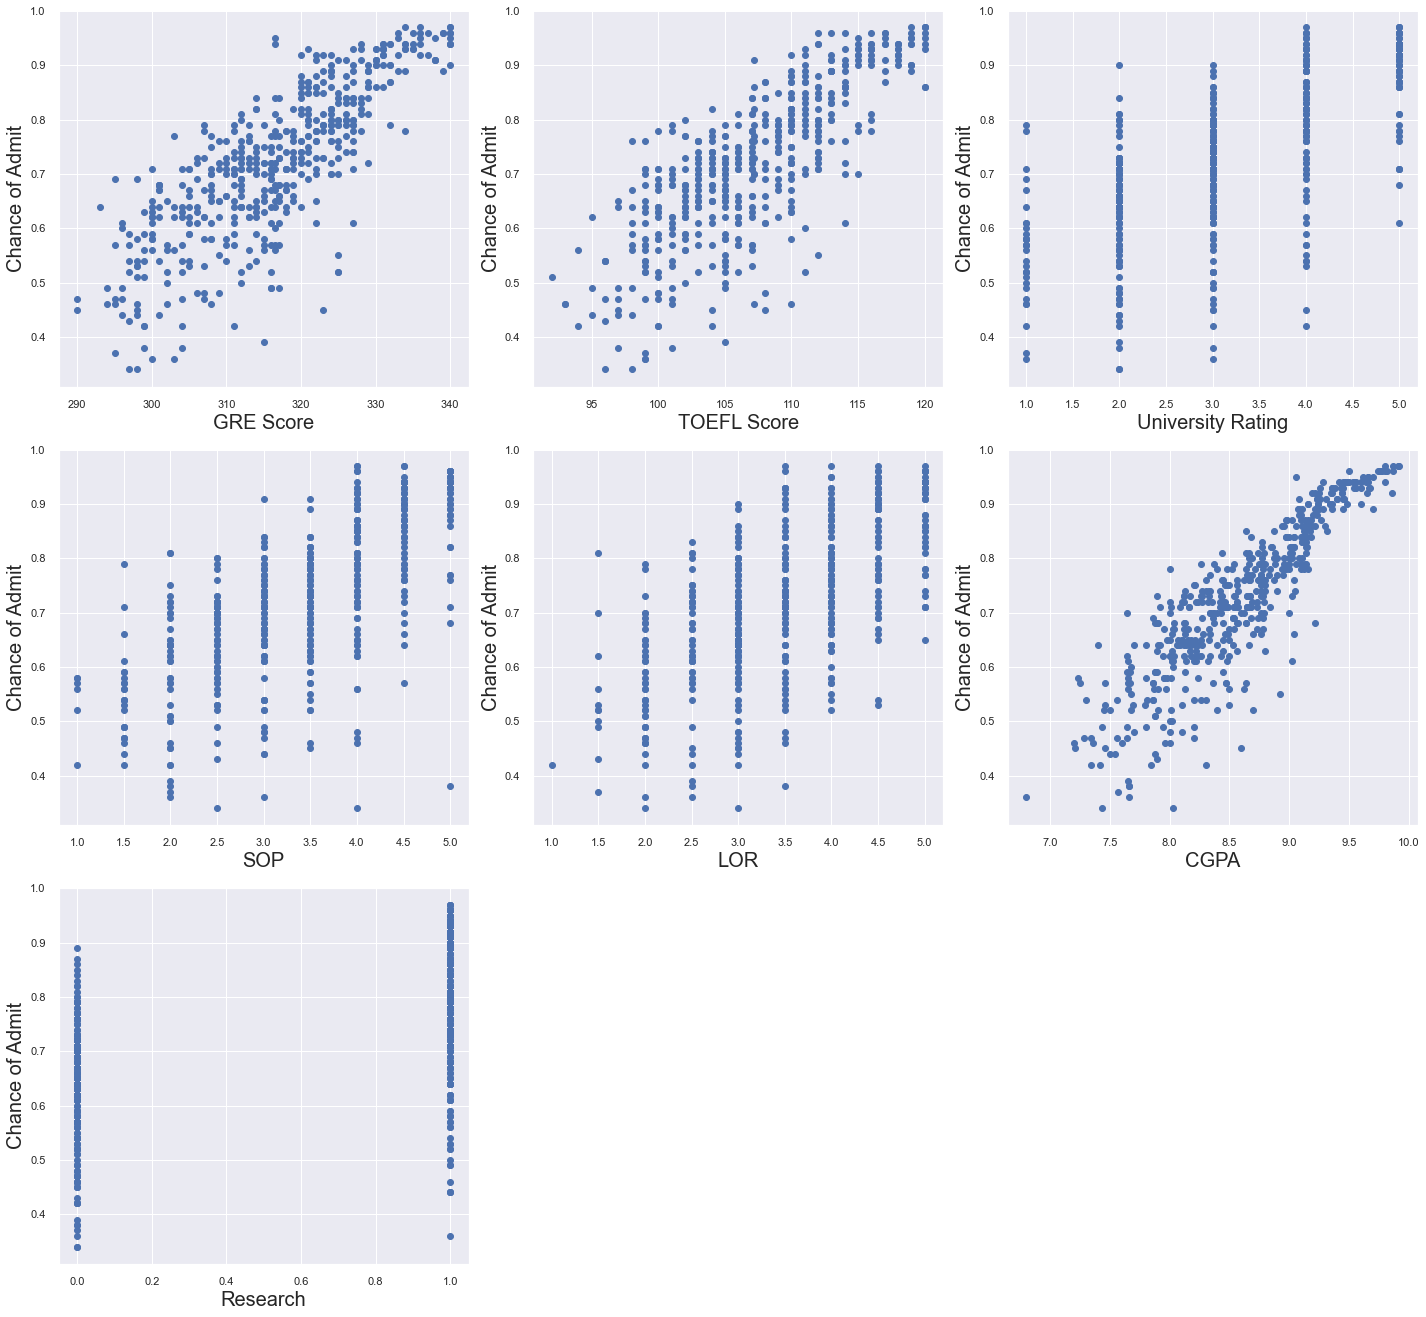

In [361]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

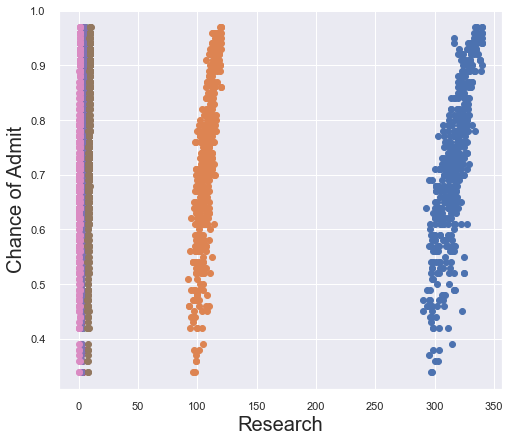

In [362]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,30), facecolor='white')


plotnumber = 1

for i in x:
    if n<=15:
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[i],y)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    n+=1
plt.tight_layout()

In [363]:
x_scaled = scaler.fit_transform(x)

In [364]:
vif = pd.DataFrame()

In [365]:
x_scaled.shape[1]

7

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [367]:
vif['vif'] =[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [368]:
vif['features'] = x.columns

In [369]:
vif

,vif,features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [370]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [371]:
y_train

378    0.56
23     0.95
122    0.57
344    0.47
246    0.72
       ... 
51     0.56
291    0.56
346    0.47
130    0.96
254    0.85
Name: Chance of Admit, Length: 375, dtype: float64

In [372]:
linear_regression.fit(x_train,y_train)

LinearRegression()

In [373]:
pickle.dump(linear_regression,open('finalised_model', 'wb'))

In [374]:
loaded_model = pickle.load(open('finalised_model', 'rb'))

In [375]:
y_pred = loaded_model.predict(x_test)

In [376]:
loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))

array([0.92190162])

In [377]:
linear_regression.score(x_train,y_train)

0.8415250484247909

In [381]:
print(adj_r2(x_train,y_train))

0.8385023654247189


In [382]:
import statsmodels.formula.api as smf  

In [383]:
linear_regression.score(x_test,y_test)

0.7534898831471064

In [384]:
adj_r2(x_test,y_test)

0.738741414617446

In [385]:
lassocv = LassoCV(alphas=None,normalize=True,max_iter=100000,cv = 10, )

In [386]:
lassocv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [388]:
alpha = lassocv.alpha_

In [390]:
lasso_reg = Lasso(alpha)

In [391]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.0341655445178153e-05)

In [392]:
lasso_reg.score(x_test,y_test)

0.7534654960492284

In [393]:
alphas = np.random.uniform(low=0, high=10, size=(50,))

In [395]:
ridgecv = RidgeCV(alphas,cv=10, normalize=True)

In [396]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([5.20256267, 4.64897763, 7.89509668, 1.2805846 , 8.92415328,
       1.76392096, 4.34880696, 1.49353373, 6.88764574, 8.14003601,
       1.92549662, 5.78138988, 7.20866573, 4.75132487, 2.61951142,
       7.34129433, 3.49206952, 6.71464426, 0.55058354, 8.97045485,
       5.21645153, 2.7522305 , 8.43500697, 4.42473532, 6.69249888,
       9.92646698, 8.52669047, 9.33548116, 8.62127893, 0.6704941 ,
       2.91815001, 1.96329173, 4.11010643, 4.19182987, 9.58267569,
       9.24082047, 9.83669073, 3.81332339, 9.64087337, 5.90315111,
       5.01065688, 2.82097053, 1.62366107, 4.48787518, 3.47297267,
       5.23855654, 5.43829719, 0.10789184, 2.9655613 , 1.68280674]),
        cv=10, normalize=True)

In [398]:
alp = ridgecv.alpha_

In [399]:
ridge_reg = Ridge(alp)

In [400]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.10789184243784389)

In [401]:
ridge_reg.score(x_test,y_test)

0.7535427266559283

In [402]:
elasticnetcv = ElasticNetCV(alphas=None,cv = 10)

In [403]:
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [404]:
elasticnetcv.alpha_

0.0011069728449315508

In [409]:
elastic_reg = ElasticNet(alpha=elasticnetcv.alpha_,l1_ratio=0.5)

In [410]:
elastic_reg.fit(x_train,y_train)

ElasticNet(alpha=0.0011069728449315508)

In [411]:
elastic_reg.score(x_test,y_test)

0.7531695370639868

In [412]:
elasticnetcv.l1_ratio

0.5

In [413]:
# ploynomial regression

In [414]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [417]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [433]:
x = dataset.iloc[:,1:2].values

In [434]:
y = dataset.iloc[:,2].values

In [435]:
from sklearn.linear_model import LinearRegression

In [436]:
linear_reg  = LinearRegression()

In [437]:
linear_reg.fit(x,y)

LinearRegression()

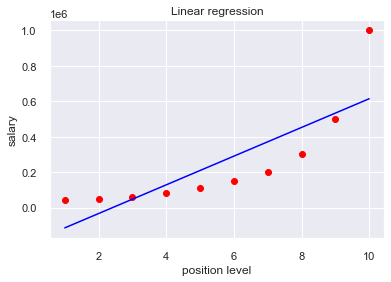

In [444]:
plt.scatter(x,y, color = 'red')
plt.plot(x,linear_reg.predict(x), color = 'blue')
plt.title('Linear regression')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

In [445]:
from sklearn.preprocessing import PolynomialFeatures


In [446]:
poly_reg = PolynomialFeatures()

In [447]:
x_poly = poly_reg.fit_transform(x)

In [448]:
poly_reg.fit(x_poly,y)

PolynomialFeatures()

In [449]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [450]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [451]:
lin_reg2 = LinearRegression()

In [452]:
lin_reg2.fit(x_poly,y)

LinearRegression()

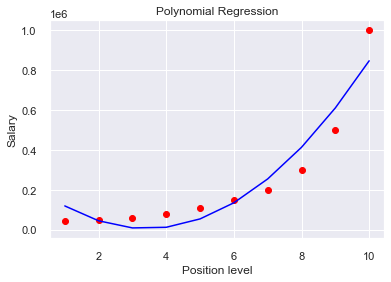

In [456]:
plt.scatter(x,y, color = 'red')
plt.plot(x,lin_reg2.predict(x_poly), 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [458]:
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly1, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression()

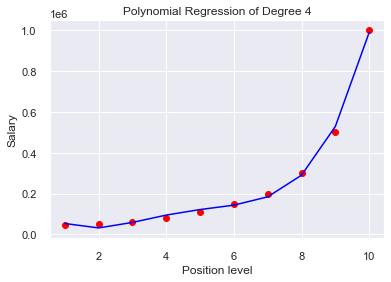

In [459]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()